In [21]:
import pandas as pd
import matplotlib.pyplot as plt

mdp_df_0_1 = pd.read_csv('mdp_log_0.1.txt')
mdp_df = pd.read_csv('mdp_log_0.5.txt')
smdp_df = pd.read_csv('smdp_log.txt')
real_dists = {"a": {"r1":[1.4, 0], "r2":[1.8, 0]},
              "b": {"r1":[1.6, 0], "r2":[3.0, 0]}}

mdp_df_0_1['completion_time'] = pd.to_datetime(mdp_df_0_1['completion_time'])
mdp_df_0_1['start_time'] = pd.to_datetime(mdp_df_0_1['start_time'])
mdp_df_0_1['processing_time'] = mdp_df_0_1['completion_time'] - mdp_df_0_1['start_time']

mdp_df['completion_time'] = pd.to_datetime(mdp_df['completion_time'])
mdp_df['start_time'] = pd.to_datetime(mdp_df['start_time'])
mdp_df['processing_time'] = mdp_df['completion_time'] - mdp_df['start_time']

smdp_df['completion_time'] = pd.to_datetime(smdp_df['completion_time'])
smdp_df['start_time'] = pd.to_datetime(smdp_df['start_time'])
smdp_df['processing_time'] = smdp_df['completion_time'] - smdp_df['start_time']

smdp_df['processing_time'] = smdp_df['processing_time'].dt.total_seconds() / 60
mdp_df['processing_time'] = mdp_df['processing_time'].dt.total_seconds() / 60
mdp_df_0_1['processing_time'] = mdp_df_0_1['processing_time'].dt.total_seconds() / 60

processing_time_dict_smdp = smdp_df.groupby(['resource', 'task'])['processing_time'].apply(list).to_dict()
processing_time_dict_mdp = mdp_df.groupby(['resource', 'task'])['processing_time'].apply(list).to_dict()
processing_time_dict_mdp_0_1 = mdp_df_0_1.groupby(['resource', 'task'])['processing_time'].apply(list).to_dict()

The real value is: 1.4
Statistics for r1-a SMDP:
Mean: 1.39, Median: 0.97, Std Dev: 1.39, Count: 60970
Statistics for r1-a MDP with 0.5 tau:
Mean: 1.28, Median: 1.00, Std Dev: 1.09, Count: 60674
Statistics for r1-a MDP with 0.1 tau:
Mean: 0.88, Median: 0.30, Std Dev: 1.22, Count: 61067


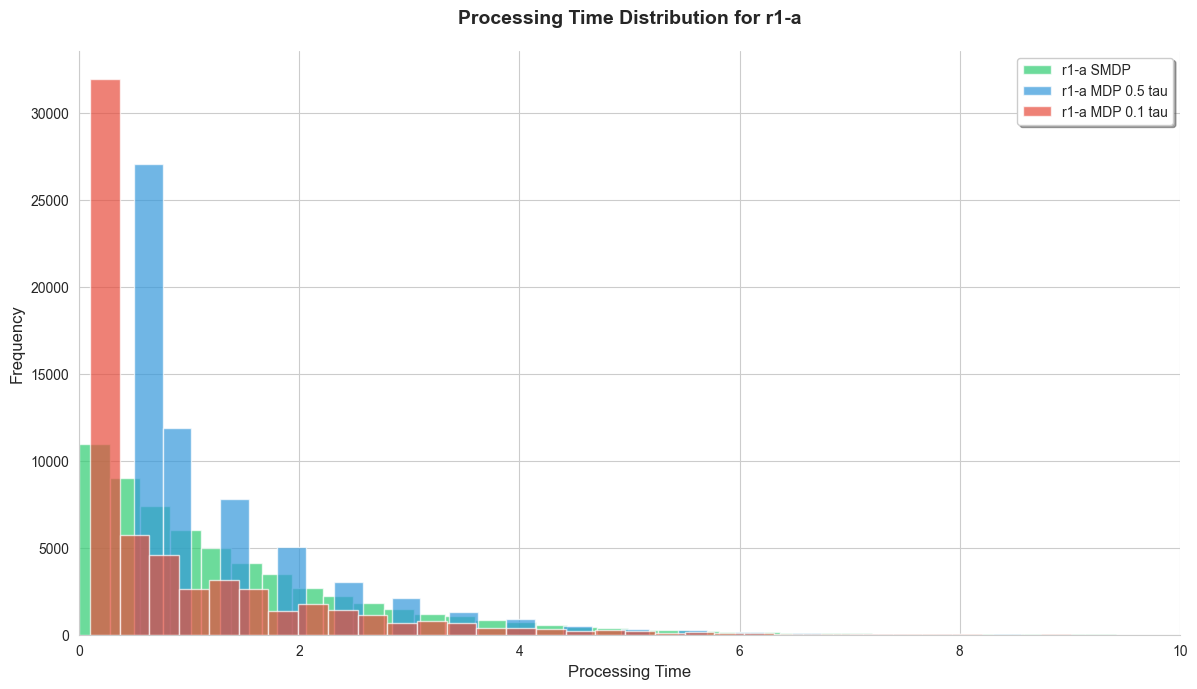

The real value is: 1.6
Statistics for r1-b SMDP:
Mean: 1.60, Median: 1.11, Std Dev: 1.60, Count: 62985
Statistics for r1-b MDP with 0.5 tau:
Mean: 1.43, Median: 1.00, Std Dev: 1.28, Count: 63008
Statistics for r1-b MDP with 0.1 tau:
Mean: 1.03, Median: 0.40, Std Dev: 1.42, Count: 62874


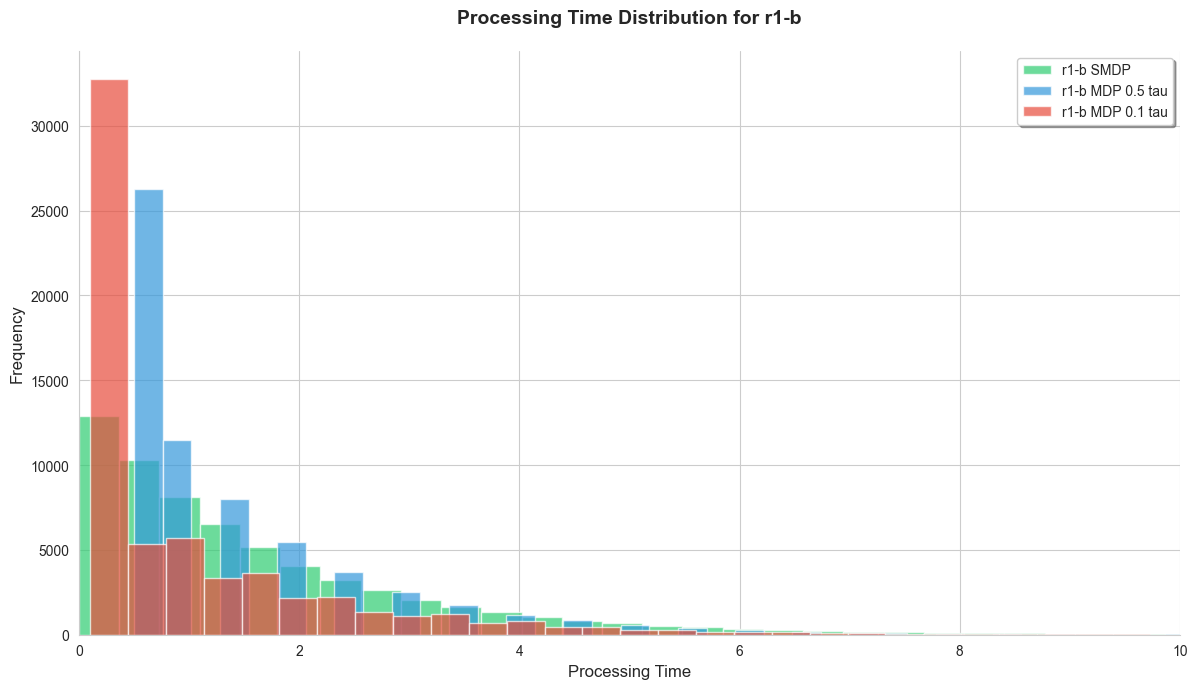

The real value is: 1.8
Statistics for r2-a SMDP:
Mean: 1.80, Median: 1.24, Std Dev: 1.80, Count: 39030
Statistics for r2-a MDP with 0.5 tau:
Mean: 1.72, Median: 1.00, Std Dev: 1.51, Count: 39326
Statistics for r2-a MDP with 0.1 tau:
Mean: 1.31, Median: 0.70, Std Dev: 1.66, Count: 38933


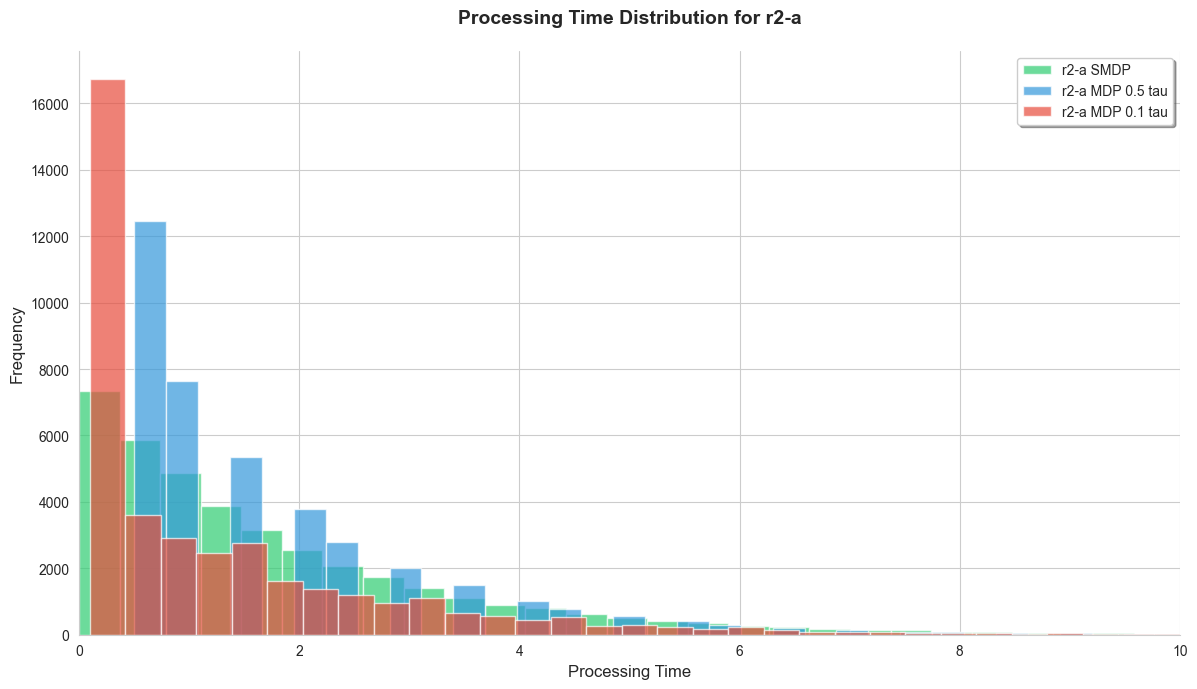

The real value is: 3.0
Statistics for r2-b SMDP:
Mean: 3.02, Median: 2.10, Std Dev: 2.99, Count: 37015
Statistics for r2-b MDP with 0.5 tau:
Mean: 2.83, Median: 2.00, Std Dev: 2.72, Count: 36992
Statistics for r2-b MDP with 0.1 tau:
Mean: 2.46, Median: 1.40, Std Dev: 2.93, Count: 37126


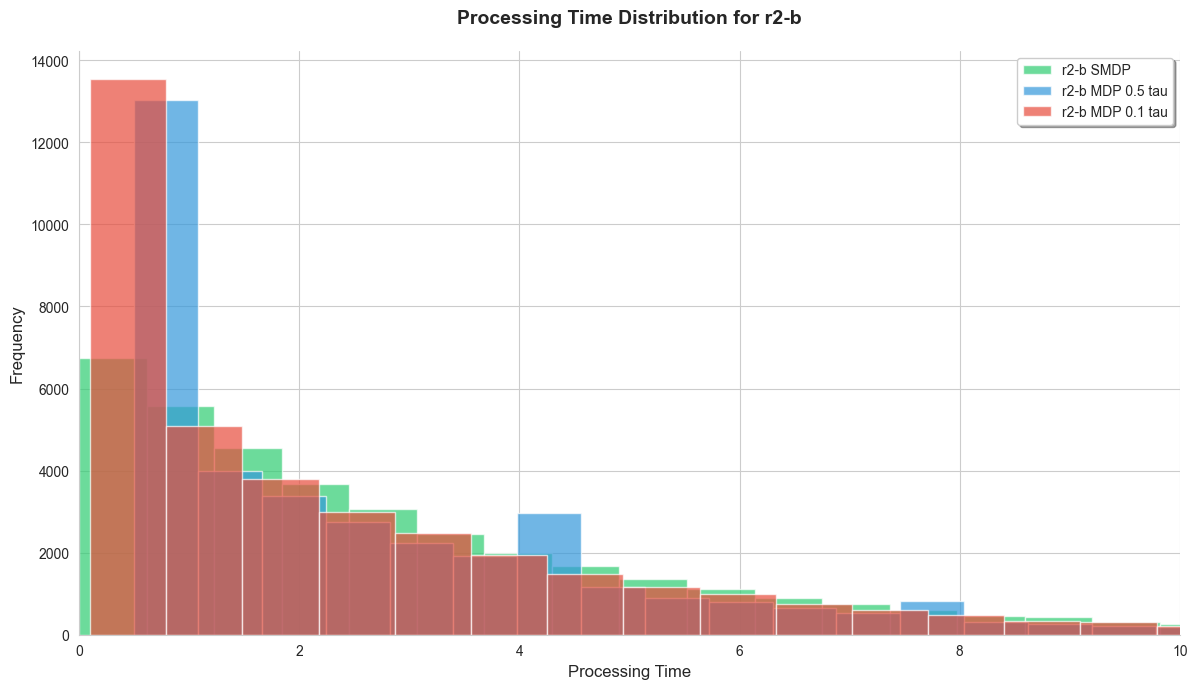

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

for resource in ['r1', 'r2']:
    for activity in ['a', 'b']:
        smdp_times = processing_time_dict_smdp[(resource, activity)]
        mdp_times = processing_time_dict_mdp[(resource, activity)]
        mdp_times_0_1 = processing_time_dict_mdp_0_1[(resource, activity)]
        
        # Calculate statistics
        smdp_mean = np.mean(smdp_times)
        smdp_median = np.median(smdp_times)
        smdp_std = np.std(smdp_times)
        smdp_count = len(smdp_times)
        
        mdp_mean = np.mean(mdp_times)
        mdp_median = np.median(mdp_times)
        mdp_std = np.std(mdp_times)
        mdp_count = len(mdp_times)

        mdp_mean_0_1 = np.mean(mdp_times_0_1)
        mdp_median_0_1 = np.median(mdp_times_0_1)
        mdp_std_0_1 = np.std(mdp_times_0_1)
        mdp_count_0_1 = len(mdp_times_0_1)
        
        print('The real value is:', real_dists[activity][resource][0])

        # Print statistics
        print(f'Statistics for {resource}-{activity} SMDP:')
        print(f'Mean: {smdp_mean:.2f}, Median: {smdp_median:.2f}, Std Dev: {smdp_std:.2f}, Count: {smdp_count}')
        
        print(f'Statistics for {resource}-{activity} MDP with 0.5 tau:')
        print(f'Mean: {mdp_mean:.2f}, Median: {mdp_median:.2f}, Std Dev: {mdp_std:.2f}, Count: {mdp_count}')
        
        print(f'Statistics for {resource}-{activity} MDP with 0.1 tau:')
        print(f'Mean: {mdp_mean_0_1:.2f}, Median: {mdp_median_0_1:.2f}, Std Dev: {mdp_std_0_1:.2f}, Count: {mdp_count_0_1}')
        
        plt.figure(figsize=(12, 7))

        # Custom color palette
        colors = ['#2ecc71', '#3498db', '#e74c3c']

        # Plot histograms with enhanced styling
        plt.hist(smdp_times, label=f'{resource}-{activity} SMDP', 
                bins=50, alpha=0.7, color=colors[0], edgecolor='white')
        plt.hist(mdp_times, label=f'{resource}-{activity} MDP 0.5 tau', 
                bins=50, alpha=0.7, color=colors[1], edgecolor='white')
        plt.hist(mdp_times_0_1, label=f'{resource}-{activity} MDP 0.1 tau', 
                bins=50, alpha=0.7, color=colors[2], edgecolor='white')

        # Enhanced titles and labels
        plt.title(f'Processing Time Distribution for {resource}-{activity}', 
                fontsize=14, pad=20, fontweight='bold')
        plt.xlabel('Processing Time', fontsize=12)
        plt.ylabel('Frequency', fontsize=12)

        # Enhanced legend
        plt.legend(frameon=True, fancybox=True, shadow=True, fontsize=10)

        # Adjust layout
        plt.tight_layout()

        # Add minor grid lines
        plt.grid(True, which='minor', linestyle=':', alpha=0.2)

        # Set spine visibility
        sns.despine(left=False, bottom=False)
        plt.xlim(0, 10)
        plt.show()